# **Self Attention**

In [1]:
import numpy as np 
import math 

**L : ** **Length of the input**

**Q :** **What I am looking for**  

**K :** **What I can offer**

**V :** **What I actually offer** 

#### Note
Both Q and K are of the same dimension (dq) while V is of dimension (dv)

Let's say that the input is My name is Ahmed

My name is Ahmed is in length of 4

In [27]:
L, dq, dv = 4,8,8
Q = np.random.randn(L, dq)
K = np.random.randn(L, dq)
V = np.random.randn(L, dv)

In [28]:
print('Q : \n', Q)
print('K : \n', K)
print('V : \n', V)

Q : 
 [[ 0.46635938 -0.59510877 -0.66856867  0.48206448  0.32942042 -1.36681101
   0.85614494 -0.8952576 ]
 [ 1.30083908 -1.55527784 -1.65941485 -0.01500044 -2.26423888 -0.23886225
   0.64771944 -1.83536998]
 [ 0.78601109  2.17079093 -0.95556458  2.23233539 -1.92321913 -0.30974206
  -0.74437963 -0.44569891]
 [-1.24050145 -0.0679195   0.96147466  0.71924158 -0.1172627  -1.07715068
  -1.56453848  1.23153007]]
K : 
 [[ 0.73421333 -1.12431073  0.47077515  0.78467098  1.30427331 -0.06162539
  -0.22029435 -1.03760991]
 [ 1.10569123 -0.32298319 -0.76892317  1.61224318  0.48924895 -0.16134861
   0.36756191 -1.10387244]
 [-0.12453072 -1.05014877  1.69053267  1.07387385  1.59467428  0.0599017
   0.50100554  1.13193236]
 [-0.9740365  -0.99204449  1.9141397  -0.87020474  1.32534766 -0.55064821
   0.76014061  0.4753191 ]]
V : 
 [[ 0.69372299 -0.33315418  1.19076015 -0.1610816   2.39293975  0.45284894
  -1.24985731 -1.86505915]
 [ 0.83181819  1.64141281 -0.4570855   1.40869969 -0.218901    0.0203629

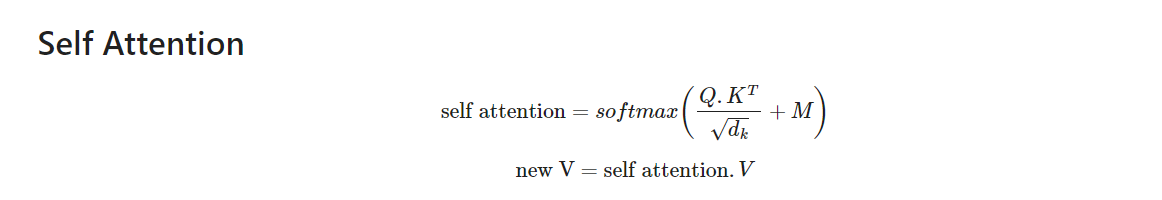

**Note :**

The variance of Q and K is around 1 while the multiplication value is arround 5 so we devide by square root of dk to normalize it as u will see in the upcoming cells

In [29]:
np.matmul(Q,K.T)

array([[ 2.32921973,  3.68378084, -0.18667779, -0.14861921],
       [ 0.73397007,  4.38728808, -6.72816033, -6.13686153],
       [-2.42462216,  3.8292125 , -5.55860401, -9.84685507],
       [-0.8371753 , -2.74747328,  2.98223248,  2.32399999]])

In [30]:
Q.var(), K.var(), np.matmul(Q,K.T).var()

(1.3376821441240923, 0.8755124466842906, 17.490706682519004)

In [31]:
scaled = np.matmul(Q,K.T) / math.sqrt(dq)
Q.var(), K.var(), scaled.var()

(1.3376821441240923, 0.8755124466842906, 2.1863383353148755)

In [32]:
scaled

array([[ 0.82350353,  1.30241321, -0.06600056, -0.05254483],
       [ 0.25949761,  1.55114058, -2.3787639 , -2.1697082 ],
       [-0.85723338,  1.35383106, -1.9652633 , -3.481389  ],
       [-0.29598617, -0.97137849,  1.0543784 ,  0.82165808]])

## Masking 

* This is to ensure words don't get context from words generated in the future.
* Not required in the encoders, but required int he decoders

In [33]:
mask = np.tril(np.ones((L,L)))
mask

array([[1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 1., 0.],
       [1., 1., 1., 1.]])

In [34]:
mask[mask==0] = -np.infty
mask[mask==1] = 0
mask

array([[  0., -inf, -inf, -inf],
       [  0.,   0., -inf, -inf],
       [  0.,   0.,   0., -inf],
       [  0.,   0.,   0.,   0.]])

Why is the previous step is important ? 

* Making the value of one equal zero to make sure that it won't make any changes after adding to the scaled

* While making zero equal -infty is to make sure it will equal zero after applying the softmax function

In [35]:
scaled + mask

array([[ 0.82350353,        -inf,        -inf,        -inf],
       [ 0.25949761,  1.55114058,        -inf,        -inf],
       [-0.85723338,  1.35383106, -1.9652633 ,        -inf],
       [-0.29598617, -0.97137849,  1.0543784 ,  0.82165808]])

In [36]:
def softmax(x) :
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

In [37]:
attention = softmax(scaled+mask)
attention

array([[1.        , 0.        , 0.        , 0.        ],
       [0.21557485, 0.78442515, 0.        , 0.        ],
       [0.09564222, 0.87277587, 0.03158191, 0.        ],
       [0.11868828, 0.0604072 , 0.45799816, 0.36290636]])

In [38]:
new_v = np.matmul(attention, V)
new_v

array([[ 0.69372299, -0.33315418,  1.19076015, -0.1610816 ,  2.39293975,
         0.45284894, -1.24985731, -1.86505915],
       [ 0.80204834,  1.21574583, -0.10185142,  1.07029433,  0.34414618,
         0.11359608, -0.84629263, -1.40976782],
       [ 0.81704814,  1.37873462, -0.28013749,  1.19395184,  0.07428443,
         0.04119176, -0.8367581 , -1.28471696],
       [-0.07825421, -0.72217098,  0.01957552, -0.65556171,  0.86315752,
        -0.48623689, -1.11626041, -0.37456422]])

In [39]:
V

array([[ 0.69372299, -0.33315418,  1.19076015, -0.1610816 ,  2.39293975,
         0.45284894, -1.24985731, -1.86505915],
       [ 0.83181819,  1.64141281, -0.4570855 ,  1.40869969, -0.218901  ,
         0.02036299, -0.73538543, -1.28464516],
       [ 0.7823493 , -0.69619861,  0.15542968, -0.63710722,  1.15477105,
        -0.62985551, -2.38719945,  0.47079909],
       [-1.56832012, -1.2756044 , -0.45556935, -1.18417567,  0.17493158,
        -0.69643907,  0.46799549, -0.80248484]])

## Function

In [46]:
def softmax(x):
  return (np.exp(x).T / np.sum(np.exp(x), axis=-1)).T

def scaled_dot_product_attention(q, k, v, mask=None) : 
  ''' mask will be none incase of encoder but while dealing with decoder it will be used '''

  d_k = k.shape[-1]
  scaled = np.matmul(q, k.T) / math.sqrt(d_k)
  if mask is not None : 
    scaled = scaled + mask
  attention = softmax(scaled)
  new_v = np.matmul(attention, v)

  return new_v, attention

In [47]:
values, attention = scaled_dot_product_attention(Q, K, V, mask=mask)
print("Q\n", Q)
print("K\n", K)
print("V\n", V)
print("New V\n", values)
print("Attention\n", attention)

Q
 [[ 0.46635938 -0.59510877 -0.66856867  0.48206448  0.32942042 -1.36681101
   0.85614494 -0.8952576 ]
 [ 1.30083908 -1.55527784 -1.65941485 -0.01500044 -2.26423888 -0.23886225
   0.64771944 -1.83536998]
 [ 0.78601109  2.17079093 -0.95556458  2.23233539 -1.92321913 -0.30974206
  -0.74437963 -0.44569891]
 [-1.24050145 -0.0679195   0.96147466  0.71924158 -0.1172627  -1.07715068
  -1.56453848  1.23153007]]
K
 [[ 0.73421333 -1.12431073  0.47077515  0.78467098  1.30427331 -0.06162539
  -0.22029435 -1.03760991]
 [ 1.10569123 -0.32298319 -0.76892317  1.61224318  0.48924895 -0.16134861
   0.36756191 -1.10387244]
 [-0.12453072 -1.05014877  1.69053267  1.07387385  1.59467428  0.0599017
   0.50100554  1.13193236]
 [-0.9740365  -0.99204449  1.9141397  -0.87020474  1.32534766 -0.55064821
   0.76014061  0.4753191 ]]
V
 [[ 0.69372299 -0.33315418  1.19076015 -0.1610816   2.39293975  0.45284894
  -1.24985731 -1.86505915]
 [ 0.83181819  1.64141281 -0.4570855   1.40869969 -0.218901    0.02036299
  -0.73